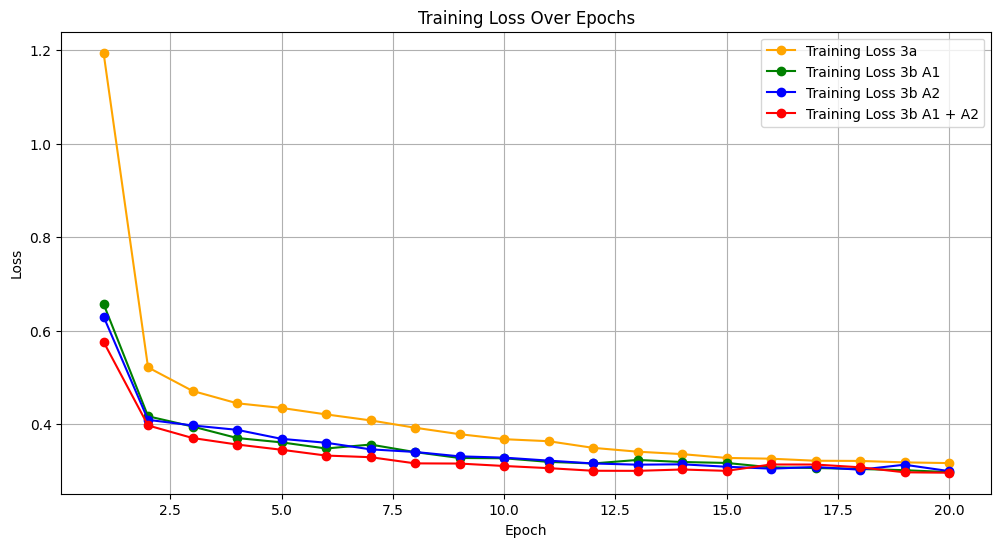

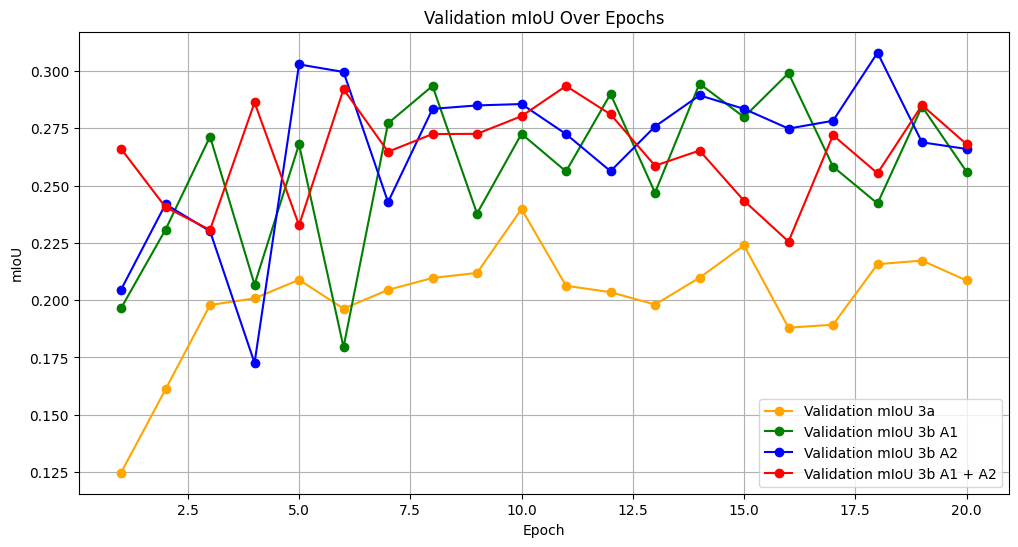

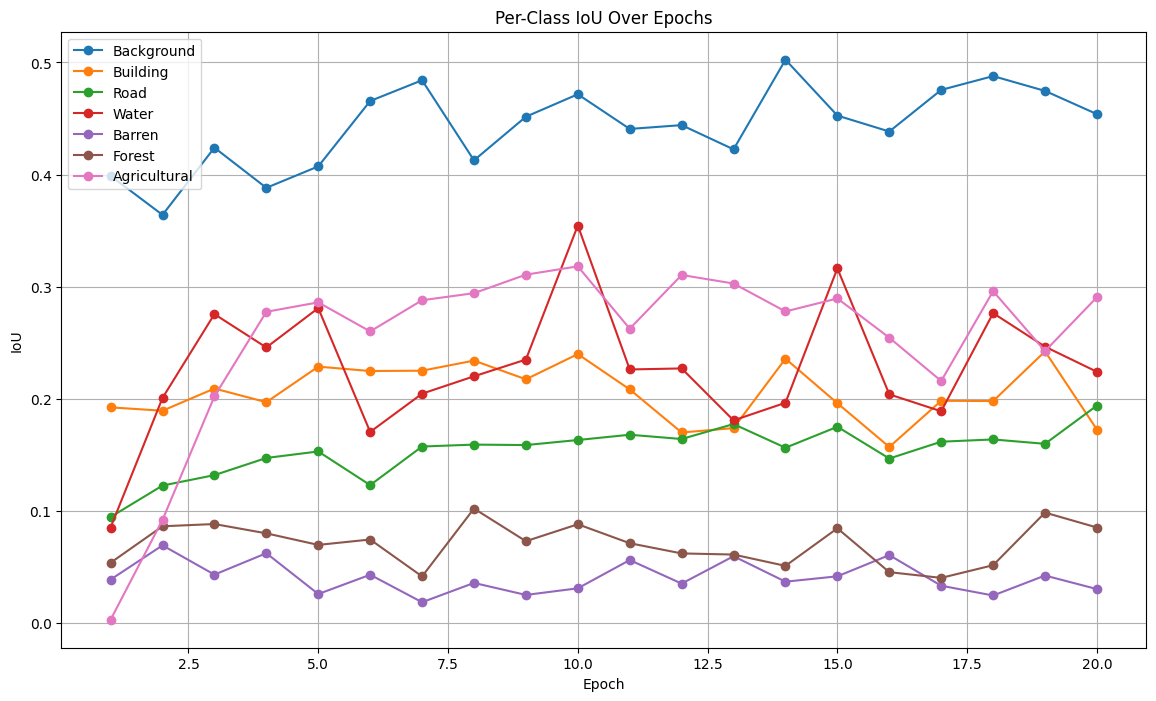

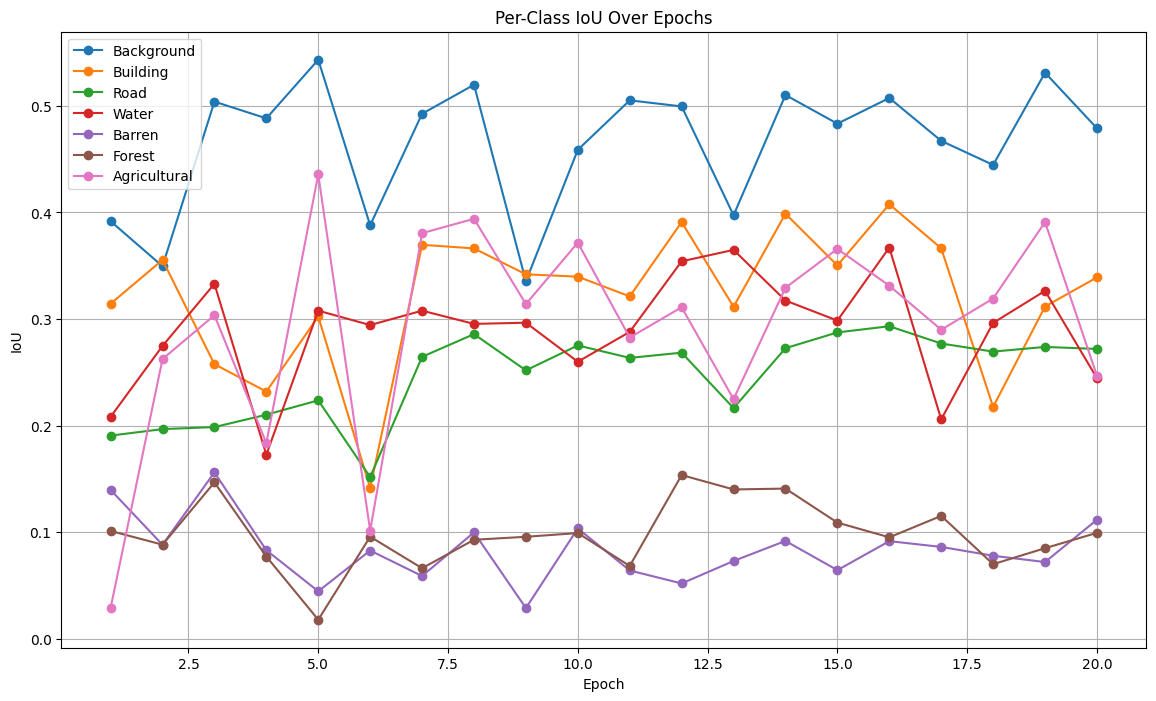

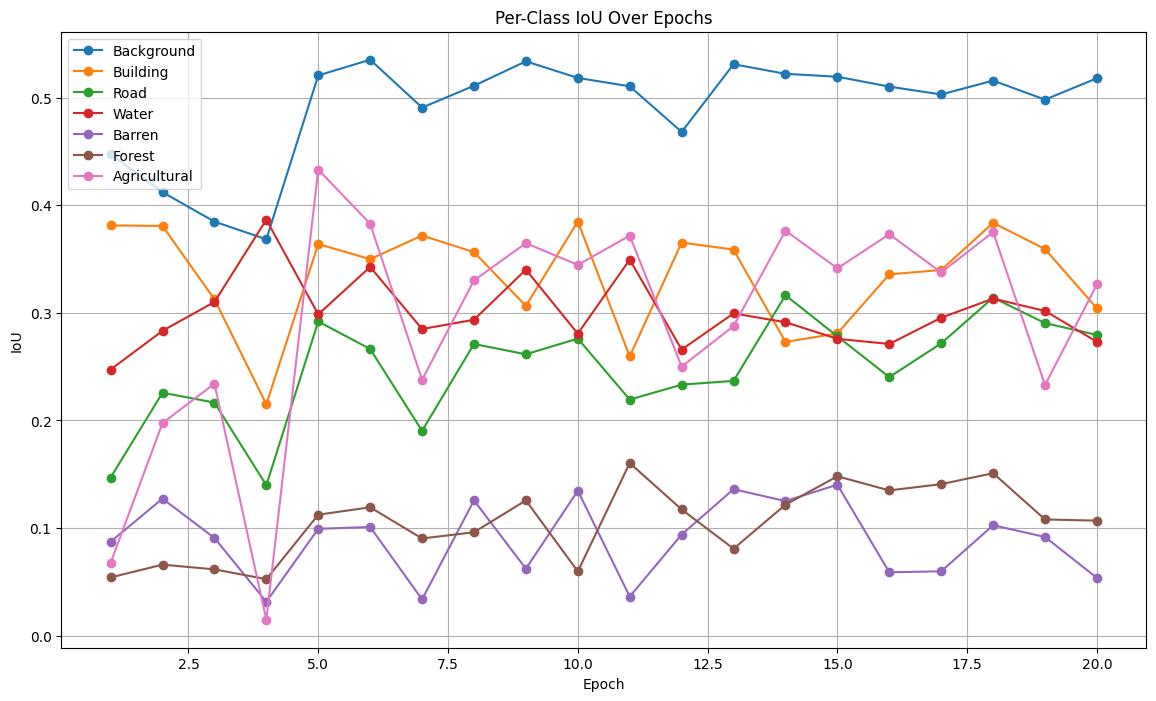

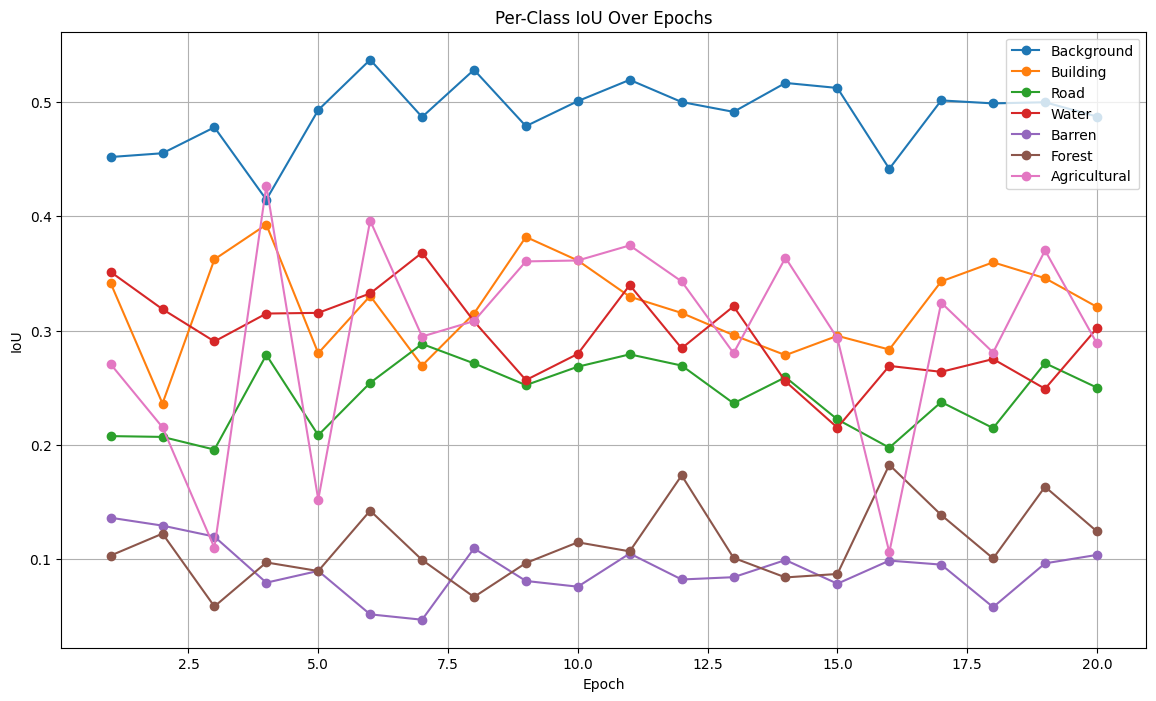

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the logs
training_loss_3a = [1.1941, 0.5213, 0.4710, 0.4446, 0.4346, 0.4208, 0.4080, 0.3923, 0.3785, 0.3678, 0.3635, 0.3493, 0.3411, 0.3359, 0.3277, 0.3261, 0.3217, 0.3213, 0.3182, 0.3167]
validation_miou_3a = [0.1247, 0.1611, 0.1979, 0.2008, 0.2089, 0.1963, 0.2045, 0.2097, 0.2119, 0.2398, 0.2063, 0.2035, 0.1981, 0.2098, 0.2239, 0.1880, 0.1893, 0.2157, 0.2173, 0.2086]

training_loss_3b_A1 = [
    0.6571, 0.4168, 0.3949, 0.3703, 0.3610, 0.3479, 0.3563, 0.3402, 0.3276, 0.3270, 
    0.3193, 0.3159, 0.3234, 0.3190, 0.3170, 0.3076, 0.3062, 0.3041, 0.3015, 0.2974
]

validation_miou_3b_A1 = [
    0.1965, 0.2308, 0.2714, 0.2068, 0.2680, 0.1795, 0.2772, 0.2935, 0.2378, 0.2726, 
    0.2562, 0.2900, 0.2469, 0.2945, 0.2799, 0.2991, 0.2583, 0.2422, 0.2845, 0.2561
]


training_loss_3b_A2 = [0.6301, 0.4092, 0.3972, 0.3878, 0.3685, 0.3602, 0.3461, 0.3405, 0.3311, 0.3284, 
                0.3220, 0.3159, 0.3133, 0.3141, 0.3089, 0.3048, 0.3083, 0.3026, 0.3132, 0.2996]

validation_miou_3b_A2 = [0.2046, 0.2419, 0.2301, 0.1726, 0.3029, 0.2996, 0.2428, 0.2835, 0.2850, 0.2856, 
            0.2725, 0.2563, 0.2758, 0.2894, 0.2835, 0.2749, 0.2783, 0.3080, 0.2689, 0.2660]



training_loss_3b_A1_A2 = [0.5760, 0.3972, 0.3703, 0.3564, 0.3452, 0.3328, 0.3293, 0.3161, 0.3157, 0.3105, 0.3059, 0.3003, 0.3001, 0.3030, 0.3001, 0.3137, 0.3136, 0.3077, 0.2970, 0.2961]
validation_miou_3b_A1_A2 = [0.2661, 0.2406, 0.2307, 0.2863, 0.2327, 0.2921, 0.2648, 0.2725, 0.2726, 0.2803, 0.2935, 0.2811, 0.2587, 0.2653, 0.2434, 0.2256, 0.2720, 0.2554, 0.2851, 0.2681]




per_class_iou_3a = {
    'Background': [
        0.3989, 0.3641, 0.4240, 0.3882, 0.4073, 0.4656, 0.4841, 0.4127, 0.4516, 0.4716, 0.4407, 0.4441, 0.4225, 0.5024, 0.4526, 0.4384, 0.4755, 0.4878, 0.4746, 0.4539
    ],
    'Building': [
        0.1925, 0.1895, 0.2093, 0.1971, 0.2288, 0.2249, 0.2252, 0.2342, 0.2175, 0.2400, 0.2085, 0.1701, 0.1740, 0.2359, 0.1962, 0.1572, 0.1984, 0.1981, 0.2424, 0.1727
    ],
    'Road': [
        0.0948, 0.1228, 0.1321, 0.1474, 0.1532, 0.1232, 0.1576, 0.1593, 0.1589, 0.1634, 0.1681, 0.1643, 0.1776, 0.1565, 0.1752, 0.1469, 0.1619, 0.1639, 0.1600, 0.1941
    ],
    'Water': [
        0.0854, 0.2009, 0.2756, 0.2459, 0.2810, 0.1706, 0.2047, 0.2202, 0.2351, 0.3546, 0.2263, 0.2272, 0.1809, 0.1966, 0.3164, 0.2041, 0.1890, 0.2765, 0.2466, 0.2242
    ],
    'Barren': [
        0.0390, 0.0695, 0.0434, 0.0625, 0.0261, 0.0433, 0.0188, 0.0360, 0.0253, 0.0312, 0.0564, 0.0354, 0.0598, 0.0371, 0.0419, 0.0608, 0.0335, 0.0248, 0.0426, 0.0305
    ],
    'Forest': [
        0.0540, 0.0865, 0.0885, 0.0802, 0.0699, 0.0747, 0.0418, 0.1023, 0.0732, 0.0883, 0.0714, 0.0623, 0.0613, 0.0512, 0.0847, 0.0456, 0.0405, 0.0518, 0.0987, 0.0854
    ],
    'Agricultural': [
        0.0032, 0.0922, 0.2023, 0.2777, 0.2861, 0.2602, 0.2880, 0.2943, 0.3108, 0.3182, 0.2626, 0.3105, 0.3029, 0.2780, 0.2896, 0.2546, 0.2160, 0.2961, 0.2427, 0.2907
    ]
}

# Plot Training Loss
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), training_loss_3a, marker='o', label='Training Loss 3a', color='orange')

plt.plot(range(1, 21), training_loss_3b_A1, marker='o', label='Training Loss 3b A1', color='green')


plt.plot(range(1, 21), training_loss_3b_A2, marker='o', label='Training Loss 3b A2', color='blue')


plt.plot(range(1, 21), training_loss_3b_A1_A2, marker='o', label='Training Loss 3b A1 + A2', color='red')



plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# Plot Validation mIoU
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), validation_miou_3a, marker='o', label='Validation mIoU 3a', color='orange')

plt.plot(range(1, 21), validation_miou_3b_A1, marker='o', label='Validation mIoU 3b A1', color='green')

plt.plot(range(1, 21), validation_miou_3b_A2, marker='o', label='Validation mIoU 3b A2', color='blue')

plt.plot(range(1, 21), validation_miou_3b_A1_A2, marker='o', label='Validation mIoU 3b A1 + A2', color='red')



plt.title('Validation mIoU Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('mIoU')
plt.grid(True)
plt.legend()
plt.show()

# Plot Per-Class IoU
plt.figure(figsize=(14, 8))
for class_name, iou_values in per_class_iou_3a.items():
    plt.plot(range(1, 21), iou_values, marker='o', label=class_name)

plt.title('Per-Class IoU Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('IoU')
plt.grid(True)
plt.legend()
plt.show()




per_class_iou_3b_A1 = {
    "Background": [
        0.3918, 0.3496, 0.5040, 0.4883, 0.5433, 0.3880, 0.4926, 0.5198, 0.3355, 0.4588, 
        0.5052, 0.4995, 0.3974, 0.5102, 0.4833, 0.5074, 0.4672, 0.4446, 0.5311, 0.4790
    ],
    "Building": [
        0.3144, 0.3555, 0.2577, 0.2320, 0.3025, 0.1416, 0.3697, 0.3663, 0.3420, 0.3398, 
        0.3213, 0.3910, 0.3116, 0.3988, 0.3503, 0.4077, 0.3664, 0.2176, 0.3118, 0.3391
    ],
    "Road": [
        0.1907, 0.1968, 0.1987, 0.2103, 0.2238, 0.1518, 0.2646, 0.2859, 0.2519, 0.2753, 
        0.2636, 0.2685, 0.2165, 0.2727, 0.2875, 0.2933, 0.2771, 0.2695, 0.2739, 0.2720
    ],
    "Water": [
        0.2083, 0.2748, 0.3331, 0.1728, 0.3079, 0.2944, 0.3079, 0.2955, 0.2966, 0.2600, 
        0.2880, 0.3542, 0.3649, 0.3174, 0.2986, 0.3671, 0.2059, 0.2964, 0.3265, 0.2445
    ],
    "Barren": [
        0.1398, 0.0883, 0.1562, 0.0832, 0.0447, 0.0829, 0.0590, 0.0999, 0.0289, 0.1036, 
        0.0642, 0.0520, 0.0731, 0.0919, 0.0645, 0.0917, 0.0863, 0.0780, 0.0721, 0.1118
    ],
    "Forest": [
        0.1013, 0.0884, 0.1468, 0.0773, 0.0180, 0.0959, 0.0663, 0.0930, 0.0958, 0.0993, 
        0.0684, 0.1537, 0.1402, 0.1410, 0.1091, 0.0953, 0.1154, 0.0701, 0.0851, 0.0995
    ],
    "Agricultural": [
        0.0290, 0.2625, 0.3036, 0.1837, 0.4357, 0.1015, 0.3806, 0.3941, 0.3141, 0.3717, 
        0.2827, 0.3111, 0.2249, 0.3294, 0.3658, 0.3313, 0.2900, 0.3193, 0.3910, 0.2468
    ],
}



# Plot Per-Class IoU
plt.figure(figsize=(14, 8))
for class_name, iou_values in per_class_iou_3b_A1.items():
    plt.plot(range(1, 21), iou_values, marker='o', label=class_name)

plt.title('Per-Class IoU Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('IoU')
plt.grid(True)
plt.legend()
plt.show()






# IoU per classe per ogni epoca
per_class_iou_3b_A2 = {
    "Background": [0.4477, 0.4122, 0.3848, 0.3684, 0.5207, 0.5353, 0.4908, 0.5111, 0.5338, 0.5184, 
                   0.5106, 0.4682, 0.5311, 0.5222, 0.5195, 0.5103, 0.5030, 0.5159, 0.4982, 0.5181],
    "Building": [0.3813, 0.3808, 0.3127, 0.2150, 0.3640, 0.3499, 0.3719, 0.3565, 0.3065, 0.3849, 
                 0.2595, 0.3654, 0.3588, 0.2729, 0.2809, 0.3358, 0.3399, 0.3837, 0.3593, 0.3041],
    "Road": [0.1469, 0.2258, 0.2166, 0.1398, 0.2920, 0.2664, 0.1903, 0.2711, 0.2615, 0.2761, 
             0.2194, 0.2333, 0.2368, 0.3164, 0.2782, 0.2403, 0.2717, 0.3141, 0.2905, 0.2795],
    "Water": [0.2473, 0.2833, 0.3101, 0.3866, 0.2986, 0.3427, 0.2850, 0.2936, 0.3402, 0.2807, 
              0.3495, 0.2659, 0.2995, 0.2913, 0.2759, 0.2711, 0.2955, 0.3133, 0.3018, 0.2731],
    "Barren": [0.0873, 0.1273, 0.0908, 0.0315, 0.0993, 0.1010, 0.0337, 0.1257, 0.0622, 0.1347, 
               0.0363, 0.0940, 0.1361, 0.1251, 0.1403, 0.0589, 0.0598, 0.1026, 0.0917, 0.0537],
    "Forest": [0.0541, 0.0660, 0.0616, 0.0525, 0.1124, 0.1193, 0.0903, 0.0961, 0.1257, 0.0597, 
               0.1604, 0.1173, 0.0808, 0.1217, 0.1481, 0.1350, 0.1408, 0.1510, 0.1080, 0.1069],
    "Agricultural": [0.0675, 0.1976, 0.2342, 0.0148, 0.4332, 0.3828, 0.2378, 0.3302, 0.3648, 0.3446, 
                     0.3718, 0.2501, 0.2877, 0.3764, 0.3414, 0.3731, 0.3376, 0.3751, 0.2330, 0.3265]
}


# Plot Per-Class IoU
plt.figure(figsize=(14, 8))
for class_name, iou_values in per_class_iou_3b_A2.items():
    plt.plot(range(1, 21), iou_values, marker='o', label=class_name)

plt.title('Per-Class IoU Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('IoU')
plt.grid(True)
plt.legend()
plt.show()




# IoU per classe per ogni epoca
per_class_iou_3b_A1_A2 = {
    "Background": [0.4518, 0.4551, 0.4778, 0.4145, 0.4929, 0.5369, 0.4868, 0.5281, 0.4788, 0.5007, 0.5193, 0.4999, 0.4913, 0.5166, 0.5122, 0.4415, 0.5013, 0.4987, 0.4997, 0.4872],
    "Building": [0.3416, 0.2362, 0.3623, 0.3927, 0.2802, 0.3303, 0.2694, 0.3149, 0.3819, 0.3613, 0.3297, 0.3154, 0.2960, 0.2785, 0.2954, 0.2834, 0.3430, 0.3597, 0.3458, 0.3207],
    "Road": [0.2077, 0.2070, 0.1959, 0.2787, 0.2085, 0.2543, 0.2883, 0.2713, 0.2523, 0.2684, 0.2792, 0.2694, 0.2364, 0.2592, 0.2223, 0.1976, 0.2375, 0.2147, 0.2715, 0.2501],
    "Water": [0.3513, 0.3187, 0.2905, 0.3149, 0.3155, 0.3325, 0.3681, 0.3081, 0.2567, 0.2796, 0.3398, 0.2845, 0.3212, 0.2555, 0.2151, 0.2691, 0.2639, 0.2751, 0.2491, 0.3020],
    "Barren": [0.1363, 0.1294, 0.1198, 0.0795, 0.0898, 0.0518, 0.0471, 0.1095, 0.0810, 0.0760, 0.1050, 0.0823, 0.0843, 0.0993, 0.0786, 0.0988, 0.0953, 0.0581, 0.0964, 0.1038],
    "Forest": [0.1032, 0.1224, 0.0587, 0.0972, 0.0897, 0.1425, 0.0994, 0.0670, 0.0967, 0.1148, 0.1069, 0.1733, 0.1012, 0.0841, 0.0871, 0.1826, 0.1387, 0.1007, 0.1634, 0.1243],
    "Agricultural": [0.2707, 0.2154, 0.1100, 0.4266, 0.1522, 0.3962, 0.2948, 0.3083, 0.3605, 0.3613, 0.3745, 0.3430, 0.2803, 0.3637, 0.2933, 0.1061, 0.3244, 0.2808, 0.3701, 0.2887],
}

# Plot Per-Class IoU
plt.figure(figsize=(14, 8))
for class_name, iou_values in per_class_iou_3b_A1_A2.items():
    plt.plot(range(1, 21), iou_values, marker='o', label=class_name)

plt.title('Per-Class IoU Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('IoU')
plt.grid(True)
plt.legend()
plt.show()

